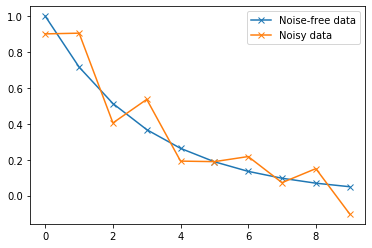

In [6]:
import pyabc
import os
import pickle
import matplotlib.pyplot as plt
from study_abc_noise.model import NonIdAblePrioredModelVars

mv = NonIdAblePrioredModelVars()

model = mv.get_model()
model_noisy = mv.get_model_noisy()

if os.path.exists("data.dat"):
    data_nonoise, data_noise = pickle.load(open("data.dat", 'rb'))
else:
    data_nonoise = model(mv.p_true)
    data = model_noisy(mv.p_true)
    pickle.dump((data_nonoise, data), open("data.dat", 'wb'))

plt.plot(data_nonoise['y'], 'x-', label="Noise-free data")
plt.plot(data['y'], 'x-', label="Noisy data")
plt.legend()

prior = mv.get_prior()

In [5]:
distance = mv.get_distance()

abc = pyabc.ABCSMC(model, prior, distance, population_size=10000)
abc.new("sqlite:///h_incorrect.db", data)
abc.run(max_nr_populations=11, min_acceptance_rate=1e-4)

INFO:History:Start <ABCSMC(id=1, start_time=2020-01-11 19:11:45.445206, end_time=None)>
INFO:ABC:Calibration sample before t=0.
INFO:Epsilon:initial epsilon is 489.8981412649664
INFO:ABC:t: 0, eps: 489.8981412649664.


KeyboardInterrupt: 